In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from sklearn.metrics import confusion_matrix
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPool2D, BatchNormalization

In [2]:
np.random.seed(0)

In [3]:
# read the MNIST dataset
mnist = keras.datasets.mnist

In [4]:
# split to train and test
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
num_classes = 10

In [6]:
# normalize features
x_train = x_train / 255
x_test = x_test / 255

In [7]:
x_test[0][7]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.32941176, 0.7254902 , 0.62352941, 0.59215686,
       0.23529412, 0.14117647, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [8]:
# reshape images to three-dimensions
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [9]:
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [10]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [11]:
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [12]:
model1 = Sequential()
model1.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=x_train.shape[1:]))
model1.add(MaxPool2D(pool_size=(2, 2)))
model1.add(BatchNormalization())
model1.add(Flatten())
model1.add(Dense(units=10, activation='softmax'))

model1.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [13]:
model2 = Sequential()
model2.add(Conv2D(filters=32, kernel_size=3,activation='relu',input_shape=x_train.shape[1:]))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(Conv2D(filters=128, kernel_size=3,activation='relu'))
model2.add(MaxPool2D(pool_size=(2, 2)))
model2.add(BatchNormalization())
model2.add(Flatten())
model2.add(Dense(units=128, activation='relu'))
model2.add(Dense(units=10, activation='softmax'))

model2.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [14]:
model3 = Sequential()
model3.add(Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=x_train.shape[1:]))
model3.add(Conv2D(filters=32, kernel_size=3, activation="relu"))
model3.add(Conv2D(filters=64, kernel_size=3, activation="relu"))
model3.add(MaxPool2D(pool_size=(2, 2)))
model3.add(BatchNormalization())   
model3.add(Conv2D(filters=128, kernel_size=3, activation="relu"))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(BatchNormalization())
model3.add(Flatten())
model3.add(Dense(units=256,activation="relu"))
model3.add(Dense(units=10,activation="softmax"))

model3.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [15]:
model4 = Sequential()
model4.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=x_train.shape[1:]))
model4.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model4.add(MaxPool2D(pool_size=(2,2)))
model4.add(BatchNormalization())
model4.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model4.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model4.add(MaxPool2D(pool_size=(2,2)))
model4.add(BatchNormalization())
model4.add(Flatten())
model3.add(Dense(units=128,activation="relu"))
model4.add(Dense(units=10, activation='softmax'))

model4.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [16]:
epochs = 5

In [18]:
model1.fit(x=x_train, y=y_train, epochs=epochs, validation_split=0.2, shuffle=True)

Epoch 1/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.1488 - accuracy: 0.9547 - val_loss: 0.0761 - val_accuracy: 0.9771
Epoch 2/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0621 - accuracy: 0.9812 - val_loss: 0.0714 - val_accuracy: 0.9798
Epoch 3/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0413 - accuracy: 0.9867 - val_loss: 0.0877 - val_accuracy: 0.9762
Epoch 4/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0317 - accuracy: 0.9898 - val_loss: 0.0744 - val_accuracy: 0.9797
Epoch 5/5
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0234 - accuracy: 0.9921 - val_loss: 0.0916 - val_accuracy: 0.9781


In [19]:
model2.fit(x=x_train, y=y_train, epochs=epochs, validation_split=0.2, shuffle=True)

Epoch 1/5
1500/1500 [==============================] - 34s 22ms/step - loss: 0.0984 - accuracy: 0.9708 - val_loss: 0.0466 - val_accuracy: 0.9862
Epoch 2/5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0424 - accuracy: 0.9869 - val_loss: 0.0708 - val_accuracy: 0.9794
Epoch 3/5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0267 - accuracy: 0.9920 - val_loss: 0.0833 - val_accuracy: 0.9744
Epoch 4/5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0215 - accuracy: 0.9933 - val_loss: 0.0712 - val_accuracy: 0.9827
Epoch 5/5
1500/1500 [==============================] - 37s 25ms/step - loss: 0.0169 - accuracy: 0.9946 - val_loss: 0.0487 - val_accuracy: 0.9872


In [22]:
model3.fit(x=x_train, y=y_train, epochs=epochs, validation_split=0.2, shuffle=True)

Epoch 1/5
1500/1500 [==============================] - 104s 69ms/step - loss: 0.1129 - accuracy: 0.9679 - val_loss: 0.0826 - val_accuracy: 0.9802
Epoch 2/5
1500/1500 [==============================] - 115s 77ms/step - loss: 0.0465 - accuracy: 0.9868 - val_loss: 0.0555 - val_accuracy: 0.9857
Epoch 3/5
1500/1500 [==============================] - 117s 78ms/step - loss: 0.0364 - accuracy: 0.9896 - val_loss: 0.1565 - val_accuracy: 0.9625
Epoch 4/5
1500/1500 [==============================] - 112s 75ms/step - loss: 0.0307 - accuracy: 0.9914 - val_loss: 0.0492 - val_accuracy: 0.9871
Epoch 5/5
1500/1500 [==============================] - 111s 74ms/step - loss: 0.0218 - accuracy: 0.9937 - val_loss: 0.0490 - val_accuracy: 0.9888


In [17]:
model4.fit(x=x_train, y=y_train, epochs=epochs, validation_split=0.2, shuffle=True)

Epoch 1/5
1500/1500 [==============================] - 62s 41ms/step - loss: 0.0944 - accuracy: 0.9707 - val_loss: 0.0625 - val_accuracy: 0.9811
Epoch 2/5
1500/1500 [==============================] - 55s 37ms/step - loss: 0.0415 - accuracy: 0.9870 - val_loss: 0.0826 - val_accuracy: 0.9772
Epoch 3/5
1500/1500 [==============================] - 55s 37ms/step - loss: 0.0306 - accuracy: 0.9904 - val_loss: 0.0501 - val_accuracy: 0.9853
Epoch 4/5
1500/1500 [==============================] - 56s 37ms/step - loss: 0.0243 - accuracy: 0.9924 - val_loss: 0.0357 - val_accuracy: 0.9899
Epoch 5/5
1500/1500 [==============================] - 66s 44ms/step - loss: 0.0175 - accuracy: 0.9943 - val_loss: 0.0500 - val_accuracy: 0.9872


In [18]:
model1.save('models/model1.weights')
model2.save('models/model2.weights')
model3.save('models/model3.weights')
model4.save('models/model4.weights')

INFO:tensorflow:Assets written to: model4.weights\assets


In [27]:
model1 = keras.models.load_model('models/model1.weights')
model2 = keras.models.load_model('models/model2.weights')
model3 = keras.models.load_model('models/model3.weights')
model4 = keras.models.load_model('models/model4.weights')

In [28]:
test_loss, test_acc = model1.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 1s 3ms/step - loss: 0.0864 - accuracy: 0.9787
Test Loss: 0.08636116236448288, Test Accuracy: 0.9786999821662903


In [29]:
test_loss, test_acc = model2.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 3s 8ms/step - loss: 0.0474 - accuracy: 0.9880
Test Loss: 0.04740525037050247, Test Accuracy: 0.9879999756813049


In [30]:
test_loss, test_acc = model3.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 6s 19ms/step - loss: 0.0415 - accuracy: 0.9889
Test Loss: 0.0414704829454422, Test Accuracy: 0.9889000058174133


In [31]:
test_loss, test_acc = model4.evaluate(x_test, y_test)
print("Test Loss: {}, Test Accuracy: {}".format(test_loss, test_acc))

313/313 [==============================] - 4s 11ms/step - loss: 0.0381 - accuracy: 0.9893
Test Loss: 0.03807058930397034, Test Accuracy: 0.989300012588501


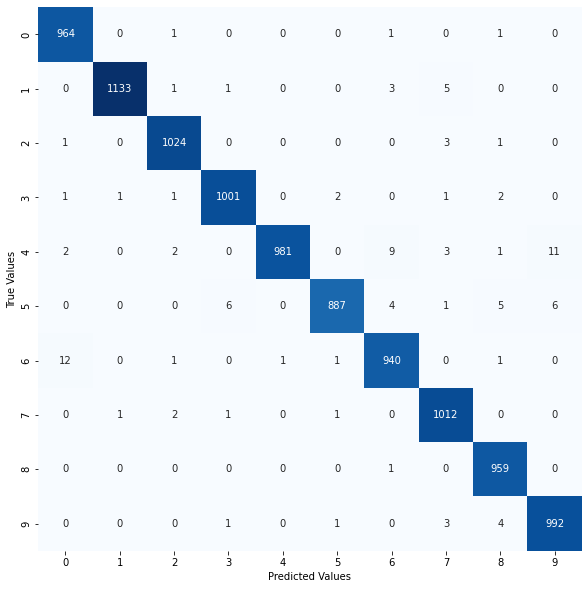

In [24]:
fig = plt.figure(figsize=(10, 10)) # Set Figure

y_pred = model4.predict(x_test)

y_pred_res = np.argmax(y_pred, axis=1)
y_test_res = np.argmax(y_test, axis=1)

mat = confusion_matrix(y_test_res, y_pred_res)
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues, fmt='d')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');

plt.show();

In [25]:
predicted=np.argmax(model4.predict(x_test), axis=1)
y_test_res = np.argmax(y_test, axis=1)
incorrect = np.nonzero(predicted != y_test_res)[0]
correct = np.nonzero(predicted == y_test_res)[0]

print(len(correct), len(incorrect))

9893 107


In [32]:
img = cv2.imread('samples/two.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)
newimg = resized / 255
newimg = np.array(newimg).reshape(-1, 28, 28, 1)
predictions = model4.predict(newimg)
print(np.argmax(predictions))

2
